In [61]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.datahandlers import GalaxyDataHandler, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures, dashboard
from cosinorage.bioages import CosinorAge

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
reload_galaxy = False

In [63]:
preprocess_args = {
    'rescale_factor': 1/(10),
    'autocalib_sd_criter': 0.01,
    'autocalib_sphere_crit': 0.02,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.00067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
}

In [64]:
if reload_galaxy:
    galaxy_handler = GalaxyDataHandler(galaxy_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess_args=preprocess_args, verbose=True)
    with open("pickle/galaxy_handler.pkl", "wb") as file:
        pickle.dump(galaxy_handler, file)
else:
    with open("pickle/galaxy_handler.pkl", "rb") as file:
        galaxy_handler = pickle.load(file)

In [65]:
galaxy_handler.get_meta_data()

{'datasource': 'samsung galaxy smartwatch',
 'raw_n_datapoints': 12537000,
 'raw_start_datetime': Timestamp('2024-10-16 21:58:17.509000'),
 'raw_end_datetime': Timestamp('2024-10-22 21:59:52.495000'),
 'raw_data_frequency': '25Hz',
 'raw_data_type': 'accelerometer',
 'raw_data_unit': 'custom',
 'calibration_offset': array([-0.01739324,  0.00449154, -0.00464635]),
 'calibration_scale': array([0.99252398, 0.99404835, 0.989714  ]),
 'total_time': 431999.96,
 'wear_time': 405619.60000000003,
 'non-wear_time': 26380.359999999986}

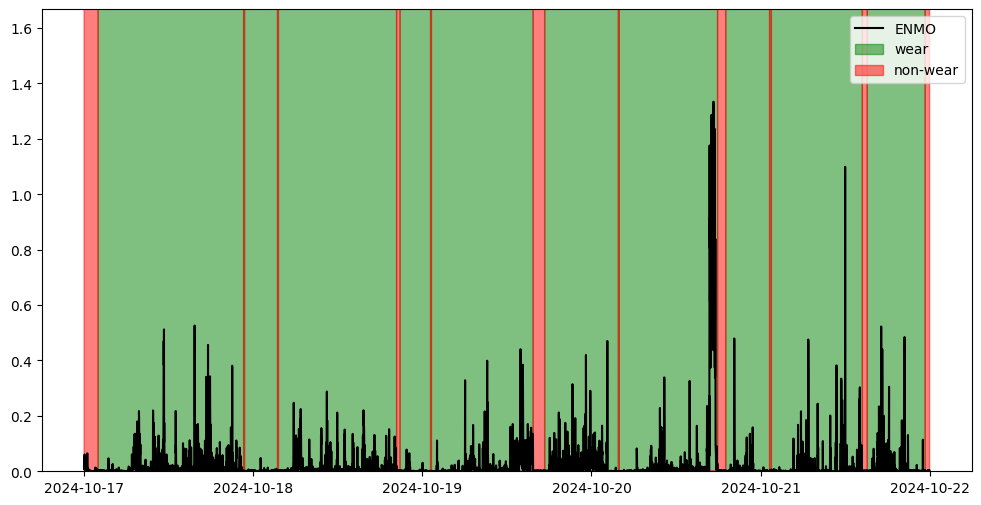

In [66]:
plot_enmo(galaxy_handler)

In [67]:
features_args = {
    'sleep_ck_sf': 0.005,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 50,
    'pa_cutpoint_lm': 150,
    'pa_cutpoint_mv': 300,
}

In [68]:
features = WearableFeatures(galaxy_handler, features_args)

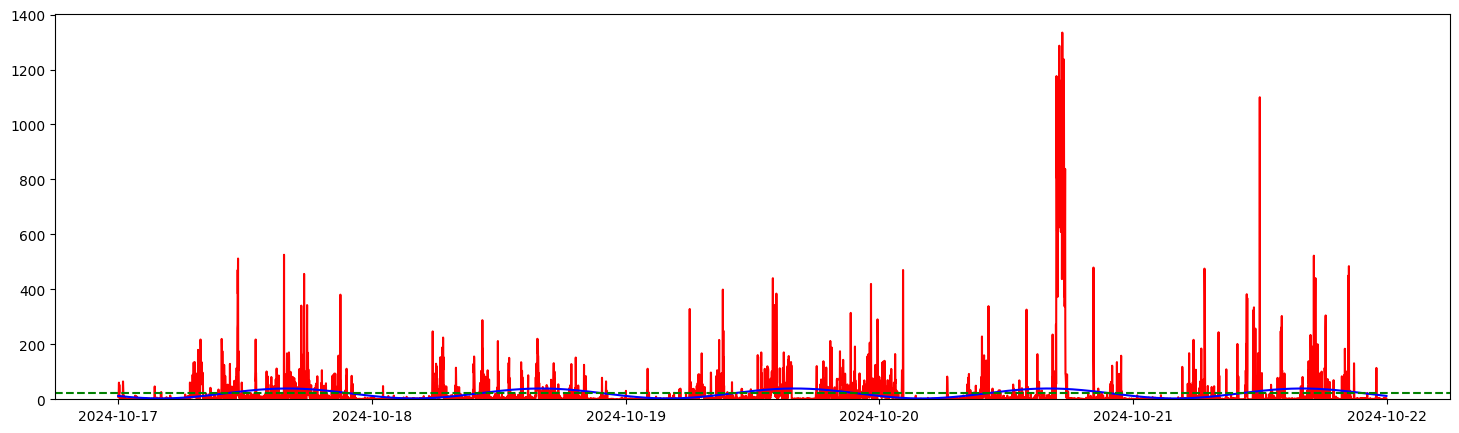

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/dashboard.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


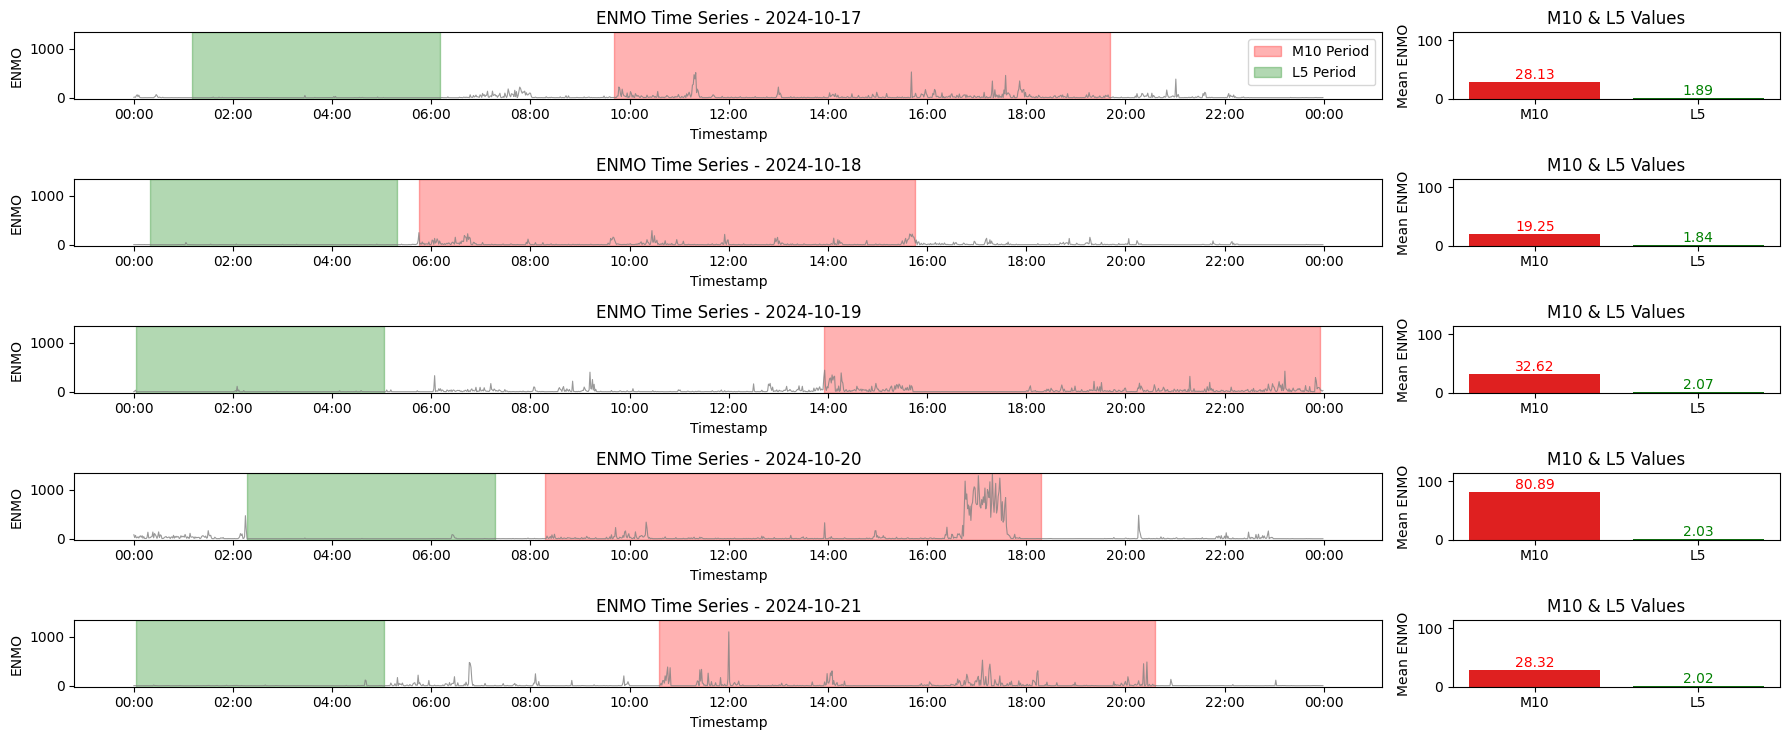

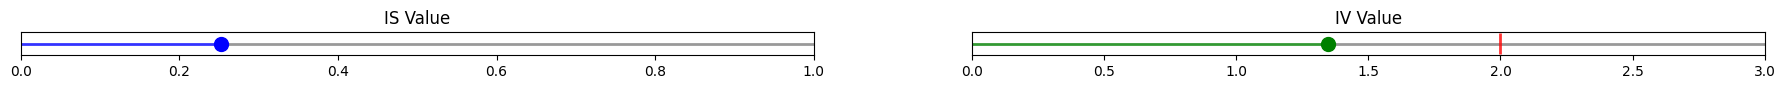

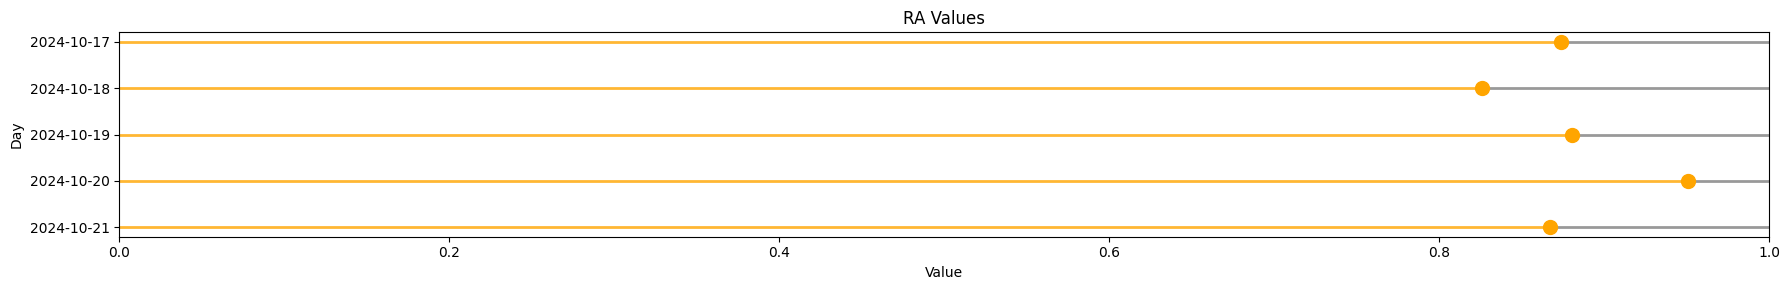

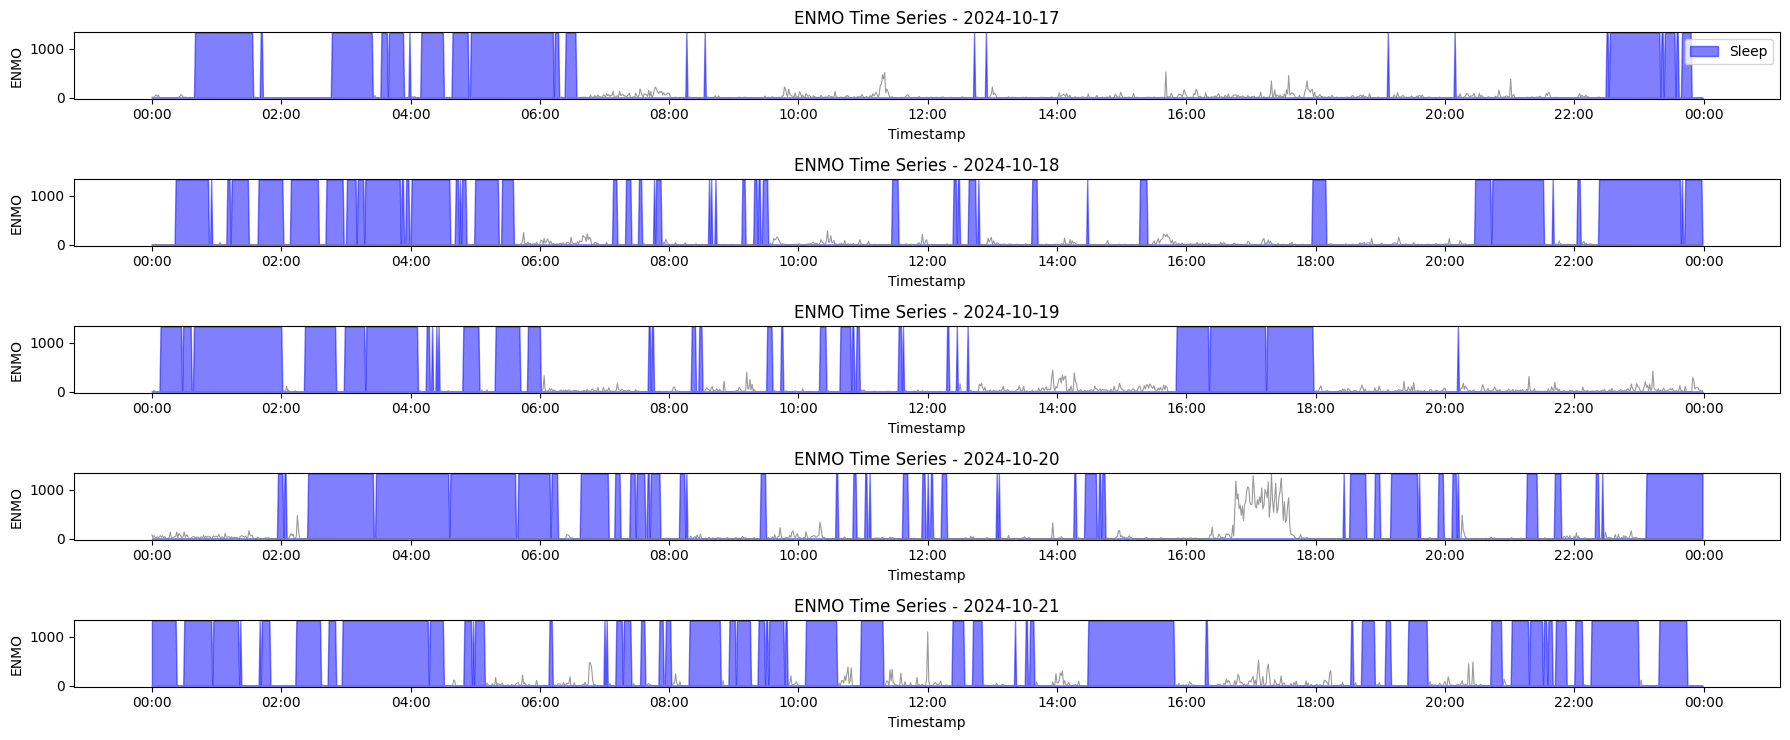

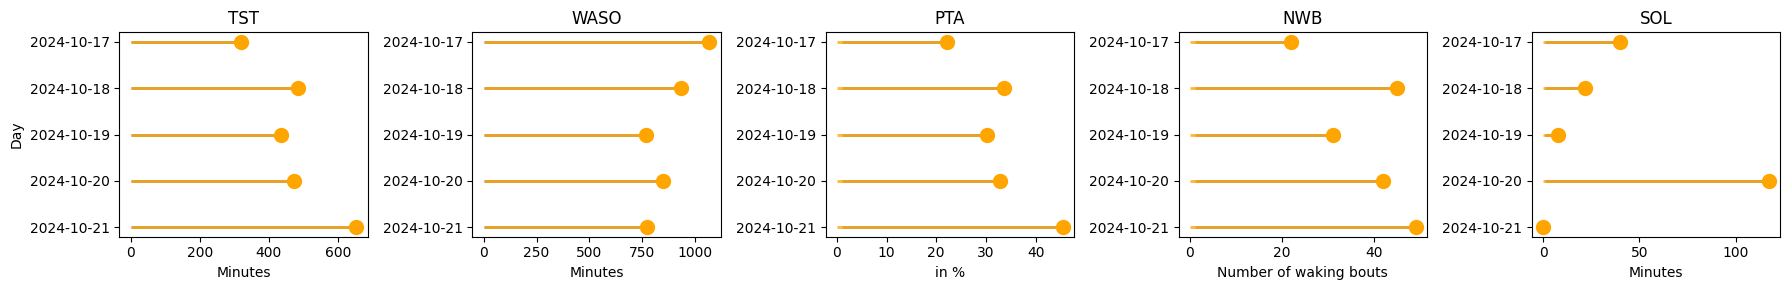

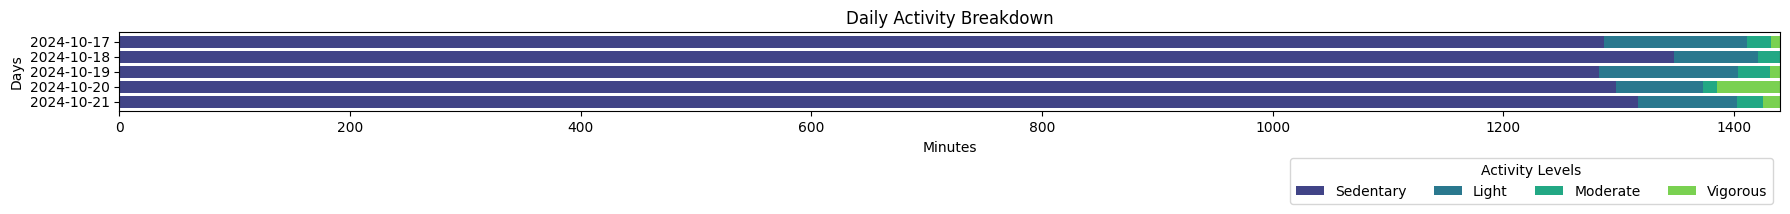

In [69]:
dashboard(features)

In [70]:
features.get_features()['cosinor']

{'MESOR': 21.142531206755883,
 'amplitude': 18.104271299888573,
 'acrophase': 4.19672913482371,
 'acrophase_time': 961.8194687399521}

In [71]:
features.get_features()['nonparam']

{'IS': 0.2522832067585525,
 'IV': 1.3459378031892661,
 'M10': [28.133231964921386,
  19.24913187258061,
  32.62142104912912,
  80.88845733746057,
  28.31722383628204],
 'M10_start': [Timestamp('2024-10-17 09:41:00'),
  Timestamp('2024-10-18 05:45:00'),
  Timestamp('2024-10-19 13:55:00'),
  Timestamp('2024-10-20 08:18:00'),
  Timestamp('2024-10-21 10:36:00')],
 'L5': [1.8948282394673086,
  1.8352675088179202,
  2.068071645997659,
  2.031877283738411,
  2.0175939524351683],
 'L5_start': [Timestamp('2024-10-17 01:10:00'),
  Timestamp('2024-10-18 00:19:00'),
  Timestamp('2024-10-19 00:03:00'),
  Timestamp('2024-10-20 02:17:00'),
  Timestamp('2024-10-21 00:03:00')],
 'RA': [0.8737961608861852,
  0.8259122799165847,
  0.8807666826278964,
  0.9509920626099608,
  0.86697833713802]}

In [72]:
features.get_features()['physical_activity']

{'sedentary': [1287, 1348, 1283, 1298, 1317],
 'light': [124, 73, 121, 75, 86],
 'moderate': [21, 19, 27, 12, 22],
 'vigorous': [8, 0, 9, 55, 15]}

In [73]:
features.get_features()['sleep']

{'TST': [320, 485, 435, 473, 654],
 'WASO': [1069, 932, 770, 850, 771],
 'PTA': [22.222, 33.681, 30.208, 32.847, 45.417],
 'NWB': [22, 45, 31, 42, 49],
 'SOL': [40, 22, 8, 117, 0],
 'SRI': -1.2647671994440515,
 'SRI_flag': 'negative SRI - very low sleep consistency'}

In [166]:
records = [
    {'handler': galaxy_handler, 
     'age': 30, 
     'gender': 'unknown'
    }
]
cosinor_age = CosinorAge(records)
cosinor_age.get_predictions()


[{'handler': <cosinorage.datahandlers.galaxydatahandler.GalaxyDataHandler at 0x17606e160>,
  'age': 30,
  'gender': 'unknown',
  'amplitude': 18.104271299888573,
  'acrophase': 961.8194687399518,
  'mesor': 21.14253120675589,
  'cosinoage': 11.534345254937776,
  'cosinoage_advance': -18.465654745062224}]

In [165]:
import numpy as np
coefs = {
    "shape": 0.01294402,
    "rate": -13.28530410,
    "mesor": -0.02569062,
    "amp1": -0.02170987,
    "phi1": -0.13191562,
    "age": 0.08840283
}

m_n = -1.405276
m_d = 0.01462774
BA_n = -0.01447851
BA_d = 0.112165
BA_i = 133.5989

amp = 40.1 
acr = 859
mesor = 13.8 
age = 20

m = coefs["mesor"] * mesor
a = coefs["amp1"] * amp
p = coefs["phi1"] * acr
b = coefs["age"] * age
n1 = m + a + p + b
xb = n1 + coefs["shape"]

print(xb)

m_val = 1 - np.exp((m_n * np.exp(xb)) / m_d)

# Calculate cosinor age
cosinor_age = float(((np.log(BA_n * np.log(1 - m_val))) / BA_d) + BA_i)
print(cosinor_age)


-112.75961330300001
-inf


/var/folders/wl/n18csb_91230dq8v__mxqxxr0000gn/T/ipykernel_96767/2566914543.py:34: RuntimeWarning: divide by zero encountered in log
  cosinor_age = float(((np.log(BA_n * np.log(1 - m_val))) / BA_d) + BA_i)
